Сначала подключим все необходимые для работы библиотеки:

In [ ]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from matplotlib.colors import ListedColormap

А также загрузим выборки и набор данных, которые будут использованы в примерах.

[Описание набора данных](https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fopenml.org%2Fsearch%3Ftype%3Ddata%26status%3Dactive%26id%3D1590)

In [ ]:
data = pd.read_csv('adult.csv')
sample_1 = pd.read_pickle('sample_1')
sample_2 = pd.read_pickle('sample_2')
sample_3 = pd.read_pickle('sample_3')

# Описательная статистика

## Статистическое распределение выборки

### Дискретные признаки

Пусть из генеральной совокупности (всевозможных
значений признака $X$) извлечена выборка объема $n$, в которой
значение $x_1$ наблюдалось $n_1$ раз, $x_2$ наблюдалось $n_2$ раз, …, $x_k$ наблюдалось $n_k$ раз.

Значения $x_i$ называются __вариантами__, числа $n_i$ — __частотами__, величины $\dfrac {n_i}{n}$ — относительными частотами.

Упорядоченная по возрастанию выборка называется __вариационным рядом__.

Статистическим распределением выборки или __статистическим рядом__ называется перечень вариант (обычно в порядке возрастания) и
соответствующих им частот (или относительных частот):

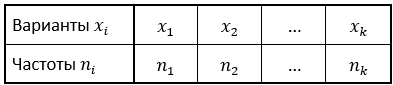

Это статистический аналог ряда распределения случайной величины. Его используют для дискретных признаков.

Один из способов получить данные для статистического ряда это использовать функцию `unique` библиотеки *numpy*

<pre><code>numpy.unique(выборка, return_counts = True)</pre></code>

[Документация функции *unique* библиотеки *numpy*](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

Функция возвращает кортеж из двух массивов: первый — отсортированный массив из уникальных значений вариант (первая строка в вышеприведенной таблице частот), второй — массив соотвествующих им частот (вторая строка в вышеприведенной таблице частот).


In [ ]:
# Пример подсчета вариант и частот для дискретного количественного признака
print('Выборка:', *sample_1)
print('Объем выборки:', len(sample_1))
print('Вариационный ряд:', *sorted(sample_1))

sample_counter = np.unique(sample_1, return_counts = True)
print('Результат вызова функции unique:', sample_counter)

# создаем отдельный массив из уникальных значений вариант
x_i = sample_counter[0]
print('Варианты:', *x_i)
# создаем массив из частот
n_i = sample_counter[1]
print('Частоты:', *n_i)

Выборка: 7 4 6 5 7 7 5 9 10 8 8 8 4 8 9 8 8 10 8 7 8 6 7 4 7 10 8 9 7 8 8 9 9 9 7 8 5 7 6 7 7 8 9 8 10 6 5 9 8 6
Объем выборки: 50
Вариационный ряд: 4 4 4 5 5 5 5 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 10 10 10 10
Результат вызова функции unique: (array([ 4,  5,  6,  7,  8,  9, 10]), array([ 3,  4,  5, 11, 15,  8,  4]))
Варианты: 4 5 6 7 8 9 10
Частоты: 3 4 5 11 15 8 4


При работе с *Series* и *DataFrame* для получения данных для статистического ряда можно использовать метод `unique` библиотеки *pandas*

<pre><code>Series.unique()</pre></code>

и метод `value_counts` библиотеки *pandas*

<pre><code>Series.value_counts()</pre></code>
<pre><code>DataFrame.value_counts()</pre></code>

Первый метод возвращает массив уникальных значений признака, второй метод — отсортированные по убыванию частоты значений признака. Последнее можно изменить, задав соответствующие параметры.

[Документация метода *unique* библиотеки *pandas*](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html)

[Документация метода *value_counts* класса *Series* библиотеки *pandas*](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)

[Документация метода *value_counts* класса *DataFrame* библиотеки *pandas*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html)

In [ ]:
n = data['marital-status'].count()
print('Объем выборки:', n)

Объем выборки: 26212


In [ ]:
# Пример определения вариант и подсчета частот для категориального признака
data['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse', nan],
      dtype=object)

In [ ]:
data.value_counts('marital-status')

marital-status
Married-civ-spouse       11929
Never-married             8719
Divorced                  3564
Separated                  826
Widowed                    812
Married-spouse-absent      341
Married-AF-spouse           21
dtype: int64

Относительные частоты могут найдены непосредственно через определение $\dfrac {n_i}{n}$.

### Непрерывные признаки

Если результаты наблюдений представляют собой не дискретную, а непрерывную случайную величину, то статистический закон распределения может быть представлен __группированным статистическим рядом__. Весь диапазон наблюдавшихся значений делится на *частичные интервалы*, для каждого интервала считается $n_i$ —  сумма частот вариант, попавших в этот интервал.

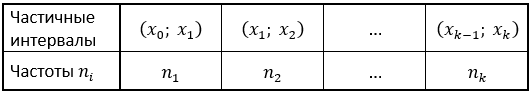

Один из способов получить данные для статистического ряда это использовать функцию `histogram` из библиотеки *numpy*

<pre><code>numpy.histogram(выборка, bins = число_частичных_интервалов)</pre></code>

[Документация функции *histogram* библиотеки *numpy*](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html)

Функция возвращает кортеж из двух массивов: первый — массив частот полученных частичных интервалов, второй — массив границ частичных интервалов.

In [ ]:
# Пример определения частичных интервалов и подсчета частот для непрерывного количественного признака
print('Выборка, первые 10 значений:', *sample_2[:10])
print('Объем выборки:', len(sample_2))

sample_counter = np.histogram(sample_2, bins = 7)
print('Результат вызова метода функции histogram:', sample_counter)

# создаем массив из границ частичных интервалов
bins_edges = sample_counter[1]
print('Границы частичных интервалов:', *bins_edges)
# создаем массив из частот
n_i = sample_counter[0]
print('Частоты:', *n_i)

Выборка, первые 10 значений: 3.694 6.027 3.819 4.061 8.535 5.278 5.191 3.952 3.53 8.502
Объем выборки: 100
Результат вызова метода функции histogram: (array([ 1,  6, 16, 22, 29, 16, 10]), array([-0.648     ,  0.76557143,  2.17914286,  3.59271429,  5.00628571,
        6.41985714,  7.83342857,  9.247     ]))
Границы частичных интервалов: -0.648 0.7655714285714285 2.179142857142857 3.5927142857142855 5.006285714285714 6.4198571428571425 7.833428571428572 9.247
Частоты: 1 6 16 22 29 16 10


## Визуализация

### Визуализация для категориальных признаков

#### Столбчатая диаграмма

Для оценки распределения категориальных признаков обычно используется столбчатая диаграмма, которая показывает, сколько наблюдений попадает в каждую категорию.

Для построения столбчатой диаграммы можно использовать функцию `bar` библиотеки *matplotlib.pyplot*, указав первым аргументом функции массив уникальных значений вариант, а вторым аргументом — массив их частот:

<pre><code>matplotlib.pyplot.bar(варианты, частоты)</pre></code>

[Документация функции *bar* библиотеки *matplotlib.pyplot*](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)

При работе с *Series* для построения столбчатой диаграммы можно использовать метод `plot.bar` библиотеки *pandas*, применяя его к результату вызова метода `value_counts`:

<pre><code>Series.value_counts().plot.bar()</pre></code>

[Документация метода *plot.bar* библиотеки *pandas*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)


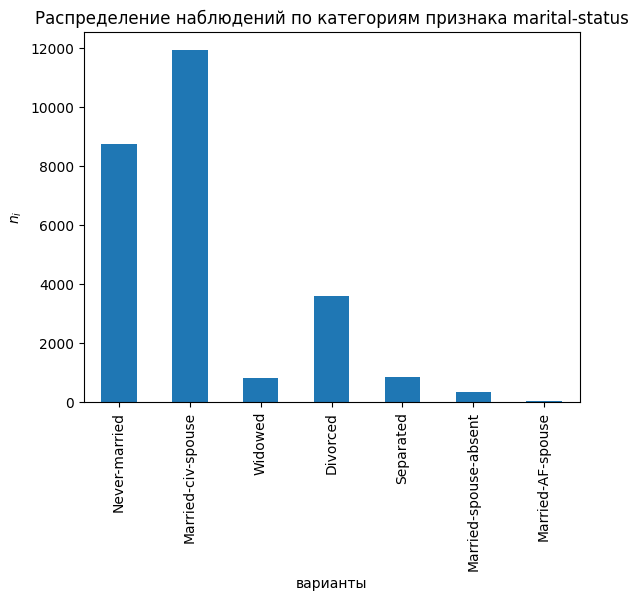

In [ ]:
# Пример построения столбчатой диаграммы для категориального признака
data['marital-status'].value_counts(sort=False).plot.bar()
plt.title('Распределение наблюдений по категориям признака marital-status')
plt.ylabel('$n_i$')
plt.xlabel('варианты')
plt.show()

### Визуализация для количественных признаков

#### Гистограммы частот и относительных частот

Гистограммы позволяют приближенно оценить функцию плотности распределения случайной величины для непрерывных признаков.

Пусть выборка задана группированным статистическим рядом



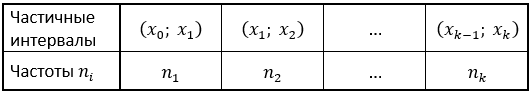

Обозначим $h_i=x_i-x_{i-1}$, где $i=1,2, \dots , k$.

__Гистограмма частот__ это ступенчатая фигура, состоящая из прямоугольников, основаниями которых служат частичные интервалы $(x_{i-1},x_i), i=1,2, \dots , k$, а высоты равны $\dfrac {n_i}{h_i}$.   
Площадь $i$-го прямоугольника гистограммы частот равна $n_i$, а суммарная площадь всех прямоугольников равна объему выборки $n$.

__Гистограмма относительных частот__ это ступенчатая фигура, состоящая из прямоугольников, основаниями которых служат частичные интервалы $(x_{i-1},x_i), i=1,2, \dots , k$, а высоты равны $\dfrac {n_i}{n \cdot h_i}$.   
Площадь $i$-го прямоугольника гистограммы относительных частот равна $\dfrac {n_i}{n}$ (относительной частоте), а суммарная площадь всех прямоугольников равна 1.

##### __Гистограмма частот__

Построим гистограмму частот для выборки *sample_2* (непрерывный количественный признак).

Для определения оптимального количества столбцов `bins` гистограммы (то есть количества частичных интервалов) существуют различные способы. Один из вариантов — правило Стёрджесса $$k=1+[log_2{n}]$$
где $[x]$ обозначает целую часть числа $x$.

In [ ]:
# считаем оптимальное количество частичных интервалов по правилу Стёрджесса
k = 1 + int(math.log2(len(sample_2)))

Для построения гистограммы можно было бы использовать функцию `hist` библиотеки *matplotlib*:

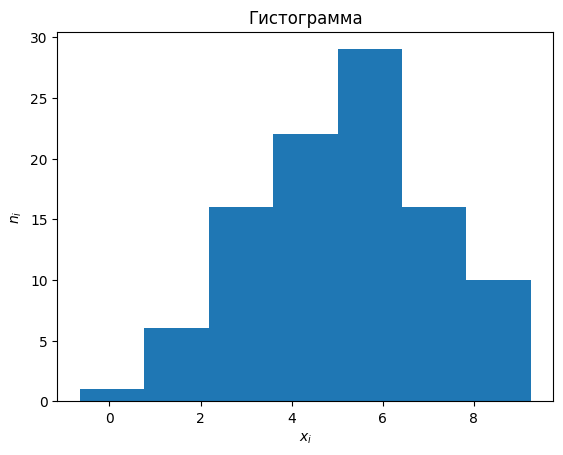

In [ ]:
plt.hist(sample_2, bins=k)
plt.title('Гистограмма')
plt.ylabel('$n_i$')
plt.xlabel('$x_i$')
plt.show()

Но, как мы видим, за высоту столбцов гистограммы при использовании `matplotlib.pyplot.hist` берется частота $n_i$ соответствующего частичного интервала. Если же нам нужна гистограмма частот, то высота столбца гистограммы должна быть $\dfrac {n_i}{h}$, где $h$ — длина частичного интервала.

Поэтому для гистограммы частот будем использовать функции`histogram` библиотеки *numpy* для расчета границ частичных интервалов и их частот и `bar` библиотеки *matplotlib* для последующего построения гистограммы.

In [ ]:
histogram = np.histogram(sample_2, bins = k)
n_i = histogram[0]
bins_edges = histogram[1]

Теперь нам нужно знать длину частичного интервала $h$. Найдем ее, например, как длину первого частичного интервала:

In [ ]:
# считаем длину частичного интервала
h = bins_edges[1] - bins_edges[0]

Расчитаем массив нужных нам  высот столбцов гистограммы по формуле $\dfrac {n_i}{h}$:

In [ ]:
# вычисляем массив с высотами столбцов гистограммы
hist_d = n_i / h

Построим гистограмму с помощью функции `bar` из библиотеки *matplotlib.pyplot*.

[Документация функции *bar* библиотеки *matplotlib.pyplot*](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)

Для построения гистограммы с использованием функции `bar` нужны или только левые границы интервалов, или середины интервалов. В данном случае будем использовать левые границы частичных интервалов (в этом случае надо указать параметр `align='edge'`). Для этого "обрежем" массив с границами частичных интервалов (последнее значение в нем не нужно):

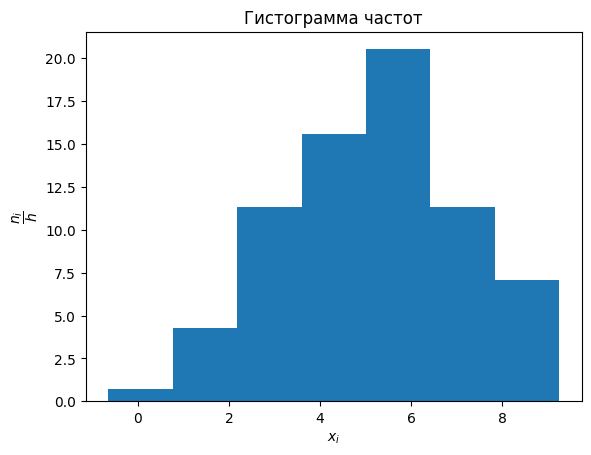

In [ ]:
# строим гистограмму частот
# параметр align='edge' указывает, что столбцы будут строиться по левым границам интервалов
# параметр width задает ширину столбца гистограммы
plt.bar(bins_edges[:-1], hist_d, align = 'edge', width = h)
plt.title('Гистограмма частот')
plt.ylabel('$ \\dfrac {n_i}{h}$')
plt.xlabel('$x_i$')
plt.show()

##### __Гистограмма относительных частот__

Для построения гистограммы относительных частот можно использовать функцию `hist` библиотеки *matplotlib.pyplot*:

<pre><code>matplotlib.pyplot.hist(выборка, bins = количество_частичных_интервалов, density=True)</pre></code>

Чтобы была построена гистограмма именно относительных частот указывается параметр `density = True`. В этом случае высоты столбцов гистограммы будут рассчитаны таким образом, чтобы их суммарная площадь была равна 1.

[Документация функции *hist* библиотеки *matplotlib.pyplot*](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

#### Полигон частот и полигон относительных частот

Полигон позволяет приближенно оценить многоугольник распределения случайной величины для дискретных количественных признаков.

Пусть выборка задана статистическим рядом



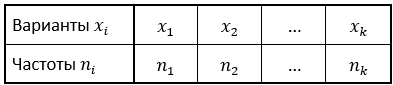

__Полигоном частот__ называется ломаная, соединяющая точки с координатами $(x_1;n_1), (x_2;n_2), \ldots , (x_k;n_k)$.

__Полигоном относительных частот__ называется ломаная, соединяющая точки с координатами $(x_1;p_1^*), (x_2;p_2^*), \ldots , (x_k;p_k^*)$, где $p_i^*=\dfrac {n_i}{n}$.

После того, как составлен статистический ряд, для построения полигона достаточно использовать функцию `plot` библиотеки *matplotlib.pyplot*, задав стиль построения "линия с точками".

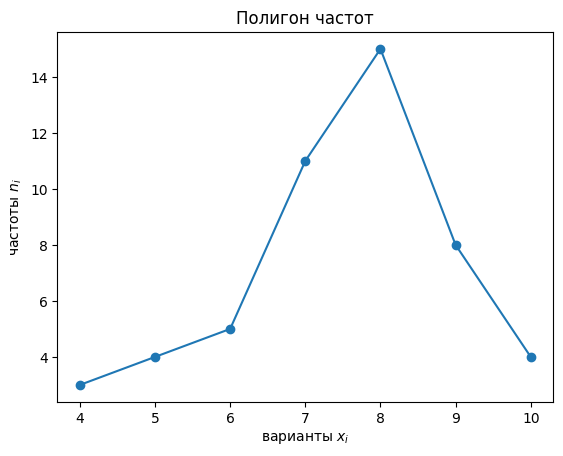

In [ ]:
# Пример построения полигона частот для дискретного количественного признака
sample_counter = np.unique(sample_1, return_counts = True)
x_i = sample_counter[0]
n_i = sample_counter[1]

plt.plot(x_i, n_i,'o-')
plt.title('Полигон частот')
plt.ylabel('частоты $n_i$')
plt.xlabel('варианты $x_i$')
plt.show()

#### Эмпирическая функция распределения

__Эмпирической функцией распределения__ выборки объема $n$ называется функция
$$F^*(x)=\frac{n_x}{n}$$
где $n_x$ — это число наблюдений, меньших $x$.

Это статистический аналог «теоретической» функции распределения $F(x)=P(X<x)$ случайной величины $X$ (и для дискретных, и для непрерывных признаков). При больших $n$ функция $F^*(x)$ используется для приближенного представления функции $F(x)$.


## Статистические оценки

### Точечные оценки

Точечной называют оценку, определяемую одним числом.

#### Выборочные квантили

Выборочная квантиль порядка $p, p \in (0,1)$ это значение, равное
$$
 \begin{cases}
    x_{[p \cdot n] +1}       & \quad \text{если } p \cdot n \text{ не целое}\\
    \dfrac {x_{p \cdot n}+x_{p \cdot n+1}}{2}  & \quad \text{если } p \cdot n \text{ целое}
  \end{cases}
$$
(здесь $[x]$ обозначает целую часть числа $x$).

Если вы вспомните определение квантили порядка $p$ случайной величины, то выборочная квантиль — это квантиль того же порядка, но для выборочной (эмпирической) функции распределения.   
То есть это значение, которое остальные значения в выборке не превышают с вероятностью $p$, где вероятность можно рассматривать как относительную частоту.

Выборочные квантили позволяют получить оценки квантилей случайной величины $X$ по данным выборки.

Можно сказать, что выборочные квантили делят выборку на заданное количество равных частей по количеству значений.   


Для вычисления выборочной квантили можно использовать функцию `quantile` библиотеки *numpy*. Вторым аргументом указывается порядок квантили:

<pre><code>numpy.quantile(выборка, порядок_квантили)</pre></code>

[Документация функции *quantile* библиотеки *numpy*](https://numpy.org/doc/stable/reference/generated/numpy.quantile.html)

Для вычисления процентилей ($p$-ый процентиль это тоже самое, что и квантиль порядка $0,p$) можно использовать функцию `percentile` библиотеки *numpy*. Вторым аргументом указывается уровень процентиля:

<pre><code>numpy.percentile(выборка, уровень_процентиля)</pre></code>

[Документация функции *percentile* библиотеки *numpy*](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html)


In [ ]:
# Пример вычисления выборочной квантили
# для дискретного количественного признака
for p in [0.2, 0.4, 0.6, 0.8]:
  quantile_p = np.quantile(sample_1, p)
  print(f'Выборочная квантиль порядка {p} равна {quantile_p}')

Выборочная квантиль порядка 0.2 равна 6.0
Выборочная квантиль порядка 0.4 равна 7.0
Выборочная квантиль порядка 0.6 равна 8.0
Выборочная квантиль порядка 0.8 равна 9.0


При работе с *Series* или *DataFrame* для вычисления выборочной квантили можно использовать метод `quantile` библиотеки *pandas*. В скобках указывается порядок квантили:

<pre><code>Series.quantile(порядок_квантили)</pre></code>
<pre><code>DataFrame.quantile(порядок_квантили)</pre></code>

[Документация метода *quantile* класса *Series* библиотеки *pandas*](https://pandas.pydata.org/docs/reference/api/pandas.Series.quantile.html)

[Документация метода *quantile* класса *DataFrame* библиотеки *pandas*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html)

In [ ]:
# Пример вычисления выборочной квантили
# для признака age из набора данных
p = 0.4
quantile_p = data['age'].quantile(p)
print(f'Выборочная квантиль порядка {p} равна {quantile_p}')

Выборочная квантиль порядка 0.4 равна 33.0


Если мы знаем, что 33 — выборочная квантиль порядка 0.4 признака
*age* (возраст) в наших данных, то мы можем заключить, что 40% людей в нашем наборе данных не старше 33 лет.

Чаще всего используют выборочные квартили. Квартили делят выборку на четыре равные части, каждая из которых включает по 25% значений:
* I выборочный квартиль или нижний квартиль $Q_1$ (он же квантиль порядка 0,25, 25%-ый процентиль) —  значение, которое отделяет первые 25%
наблюдений в выборке,

* II выборочный квартиль $Q_2$ — значение, которое делит выборку на две равные части, первые 50% и вторые 50% наблюдений.   
 $Q_2$ обычно не называют вторым квартилем, а используют термин выборочная медиана (о медиане подробнее будет далее)

* III выборочный квартиль или верхний квартиль $Q_3$ (он же квантиль порядка 0,75, 75%-ый процентиль) — значение, которое отделяет первые 75% наблюдений в выборке.

На примере признака *age*:

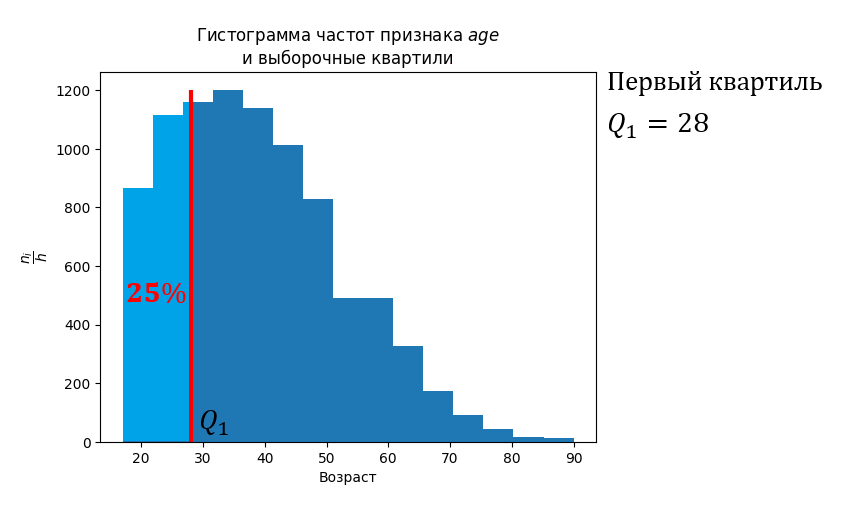

#### Меры среднего (центральной тенденции)

Это показатели, характеризующие типичное значение, присущее большинству наблюдений.

##### __Выборочная мода__

__Выборочная мода__ — это варианта, имеющая наибольшую
частоту в выборке (значение, которое в выборке встречалось наибольшее количество раз).

Для вычисления выборочной моды можно использовать функцию `mode` из модуля *stats* библиотеки *scipy*:

<pre><code>scipy.stats.mode(выборка)</pre></code>

Функция возвращает кортеж из двух значений: первое – значение моды, второе – сколько раз это значение встретилось в выборке. Если в выборке было несколько значений моды, то функция вернет только одно из них.

[Документация функции *mode* библиотеки *scipy*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html)

In [ ]:
# пример вычисления выборочной моды для дискретного количественного признака
mode_result = sts.mode(sample_1)
print('Результат вызова функции mode:', mode_result)

Mo = mode_result[0]
Mo_frequency = mode_result[1]
print(f'Выброчная мода равна {Mo}, в выборке это значение встречалось {Mo_frequency} раз')

Результат вызова функции mode: ModeResult(mode=8, count=15)
Выброчная мода равна 8, в выборке это значение встречалось 15 раз


При работе с *Series* или *DataFrame* для вычисления выборочной моды можно использовать метод `mode` библиотеки *pandas*

<pre><code>Series.mode()</pre></code>
<pre><code>DataFrame.mode()</pre></code>

Метод возвращает значение моды. Если в выборке было несколько значений моды, то метод вернет их все.

[Документация метода *mode* класса *Series* библиотеки *pandas*](https://pandas.pydata.org/docs/reference/api/pandas.Series.mode.html)

[Документация метода *mode* класса *DataFrame* библиотеки *pandas*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html)

In [ ]:
# Пример вычисления выборочной моды для категориального признака
data['native-country'].mode()

0    United-States
Name: native-country, dtype: object

Такой результат означает, что большинство людей в наборе данных являются гражданами США.

Для непрерывных количественных признаков мода будет малоинформативной величиной (одни и те же значения в выборке редко повторяются), в этом случае для оценки распределения можно посмотреть на модальный интервал (частичный интервал с наибольшей частотой).

Мода может иметь несколько значений (если несколько вариант имеют одно и то же значение частоты, наибольшее в выборке). Такое распределение называется бимодальным (две моды) либо мультимодальным. Это может свидетельствовать о наличии структуры в данных; для анализа, возможно, имеет смысл разбить данные на группы.

Пример гистограммы относительных частот признака с бимодальным распределением:

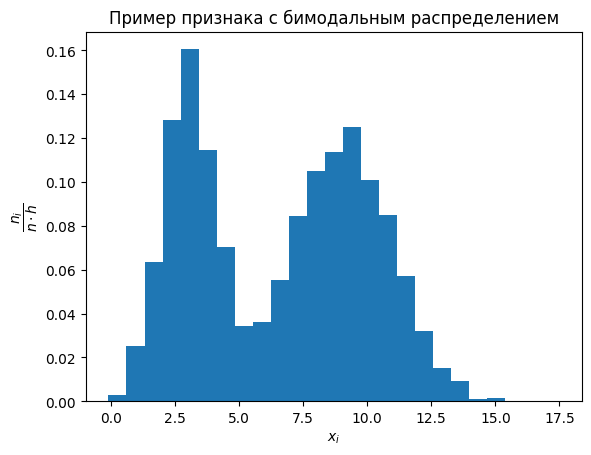

##### __Выборочная медиана__

__Выборочная медиана__ — это величина, равная
* в случае нечетного объема выборки — варианте, которая делит
вариационный ряд выборки на две равные части:
варианты одной части меньше этой величины,
варианты другой части больше

* в случае четного объема выборки — полусумме двух соседних
срединных значений вариационного ряда

Можно сказать, что справа и слева от выборочной медианы находятся по 50% наблюдений.

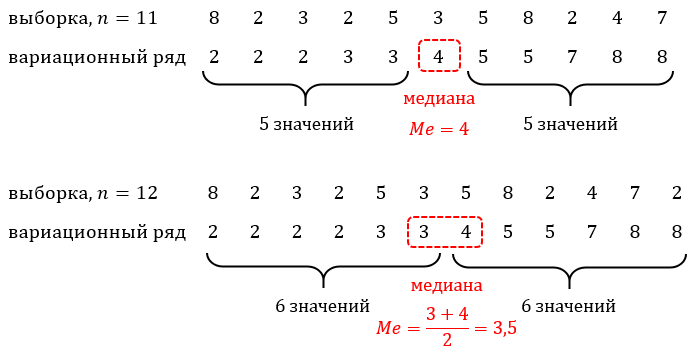

Для вычисления выборочной медианы можно использовать функцию `median` библиотеки *numpy*:

<pre><code>numpy.median(выборка)</pre></code>

[Документация функции *median* библиотеки *numpy*](https://numpy.org/doc/stable/reference/generated/numpy.median.html)

Также медиана может быть найдена как: выборочный квантиль порядка 0,5; 50%-ый процентиль.

In [ ]:
# Пример вычисления выборочной медианы для дискретного количественного признака
sample_1_median = np.median(sample_1)
print('Выборочная медиана равна', sample_1_median)

Выборочная медиана равна 8.0


При работе с *Series* или *DataFrame* для вычисления выборочной медианы можно использовать метод `median` библиотеки *pandas*

<pre><code>Series.median()</pre></code>
<pre><code>DataFrame.median()</pre></code>

[Документация метода *median* класса *Series* библиотеки *pandas*](https://pandas.pydata.org/docs/reference/api/pandas.Series.median.html)

[Документация метода *median* класса *DataFrame* библиотеки *pandas*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html)

In [ ]:
# Пример вычисления выборочной медианы для признака hours-per-week из набора данных
data['hours-per-week'].median()

40.0

Если нам известно, что для признака *hours-per-week* (количество рабочих часов в неделю) медиана равна 40, то мы можем заключить, что 50% респондентов работают не более 40 часов в неделю.

##### Выборочная средняя

__Выборочной средней__ называется среднее арифметическое значений выборки
$$\overline x_В = \frac {1}{n} \cdot \sum_{i=1}^n {x_i}$$

Выборочная средняя позволяет получить оценку генеральной средней (математического ожидания случайной величины $X$) по данным выборки.

Для вычисления выборочной средней можно использовать функцию `mean` библиотеки *numpy* (`nanmean`, если в выборке могут оказаться `NaN` и их нужно не учитывать):

<pre><code>numpy.mean(выборка)</pre></code>

[Документация функции *mean* библиотеки *numpy*](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)

[Документация функции *nanmean* библиотеки *numpy*](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html)



In [ ]:
# Пример вычисления выборочной средней
sample_1_mean = np.mean(sample_1)
sample_2_mean = np.mean(sample_2)
print('Выборочная средняя для первой выборки (дискретный признак) равна', sample_1_mean)
print('Выборочная средняя для второй выборки (непрерывный признак) равна', sample_2_mean)

Выборочная средняя для первой выборки (дискретный признак) равна 7.42
Выборочная средняя для второй выборки (непрерывный признак) равна 5.13606


При работе с *Series* или *DataFrame* для вычисления выборочной средней можно использовать метод `mean` библиотеки *pandas*

<pre><code>Series.mean()</pre></code>
<pre><code>DataFrame.mean()</pre></code>

[Документация метода *mean* класса *Series* библиотеки *pandas*](https://pandas.pydata.org/docs/reference/api/pandas.Series.mean.html)

[Документация метода *mean* класса *DataFrame* библиотеки *pandas*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html)

In [ ]:
# Пример вычисления выборочной средней для признака hours-per-week
data['hours-per-week'].mean()

40.44456737372196

Если нам известно, что для признака *hours-per-week* (количество рабочих часов в неделю) выборочная средняя равна (после округления) 40,4, то мы можем заключить, что в среднем респонденты работают 40,4 часов в неделю.

Для того, чтобы статистические оценки позволяли «правильно» судить о значениях оцениваемых параметров, эти оценки должны удовлетворять определенным требованиям. Как минимум: не иметь систематических ошибок и не иметь «слишком большой» дисперсии.

Выборочная средняя является такой «хорошей» оценкой для генеральной средней. Она обладает свойствами:
* _несмещенности_ — это означает отсутствие систематической
ошибки при использовании выборочной средней для оценки генеральной средней,

* _состоятельности_ — если по нескольким выборкам достаточно большого
объема из одной и той же генеральной совокупности найти выборочные средние, то
различия между ними будут стремиться к нулю при
увеличении объема выборок.

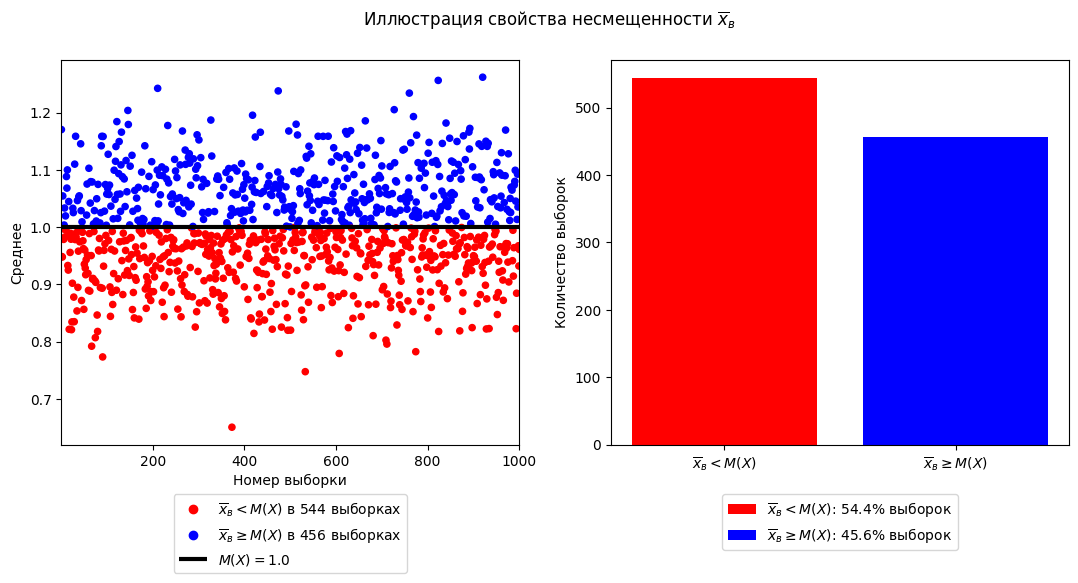

In [ ]:
# Иллюстрация несмещенности выборочной средней
# Запустите ячейку несколько раз и вы увидите, что доля выборок, выборочная средняя которых
# дает значение, меньшее мат.ожидания, и большее мат.ожидания, будет каждый раз примерно одинакова

max = 1000 # количество выборок
n = 35 # объем выборки

X = sts.norm(1,0.5) # случайная величина с нормальным распределением
X_mean = X.mean()  # математическое ожидание СВ
plt.figure(figsize = (13, 5))
plt.suptitle('Иллюстрация свойства несмещенности $\overline {x}_в$')
plt.subplot(1,2,1)
line = plt.hlines(X_mean, 1, max, linewidth=3, color='k')

samples = [X.rvs(n) for _ in range(max)] # выборки значений СВ, объема n
samples_mean = [sample.mean() for sample in samples] # выборочная средняя для каждой из выборок
# для каждой выборочной средней определяем, меньше ли она мат.ожидания СВ или нет
mean_label = lambda sample_mean, X_mean: -1 if sample_mean - X_mean < 0 else 1
mean_colors = [mean_label(sample_mean,X_mean) for sample_mean in samples_mean]
colors = ['red', 'blue']
scatter = plt.scatter(np.arange(max)+1, samples_mean, s=20, c=mean_colors, cmap=ListedColormap(colors))
mean_pos = len([i for i in mean_colors if i==1])
mean_neg = len([i for i in mean_colors if i==-1])
mean_pos_label = '$\overline {x}_в \geq M(X)$'
mean_neg_label = '$\overline {x}_в<M(X)$'
classes = [f'{mean_neg_label} в {mean_neg} выборках',f'{mean_pos_label} в {mean_pos} выборках']
plt.legend(handles=scatter.legend_elements()[0]+[line], labels=classes+[f'$M(X)=${X_mean:.1f}'], bbox_to_anchor=[0.5, -0.11], loc=9)
plt.xlabel('Номер выборки')
plt.ylabel('Среднее')
plt.xlim(1,max)

plt.subplot(1,2,2)
counts = [len([i for i in mean_colors if i==-1]),len([i for i in mean_colors if i==1])]
bar_labels = [f'{mean_neg_label}: {round(mean_neg/max*100,1)}% выборок', f'{mean_pos_label}: {round(mean_pos/max*100,1)}% выборок']
plt.bar([mean_neg_label, mean_pos_label], counts, color=colors, label=bar_labels)
plt.legend(bbox_to_anchor=[0.5, -0.11], loc=9)
plt.ylabel('Количество выборок')
plt.show()

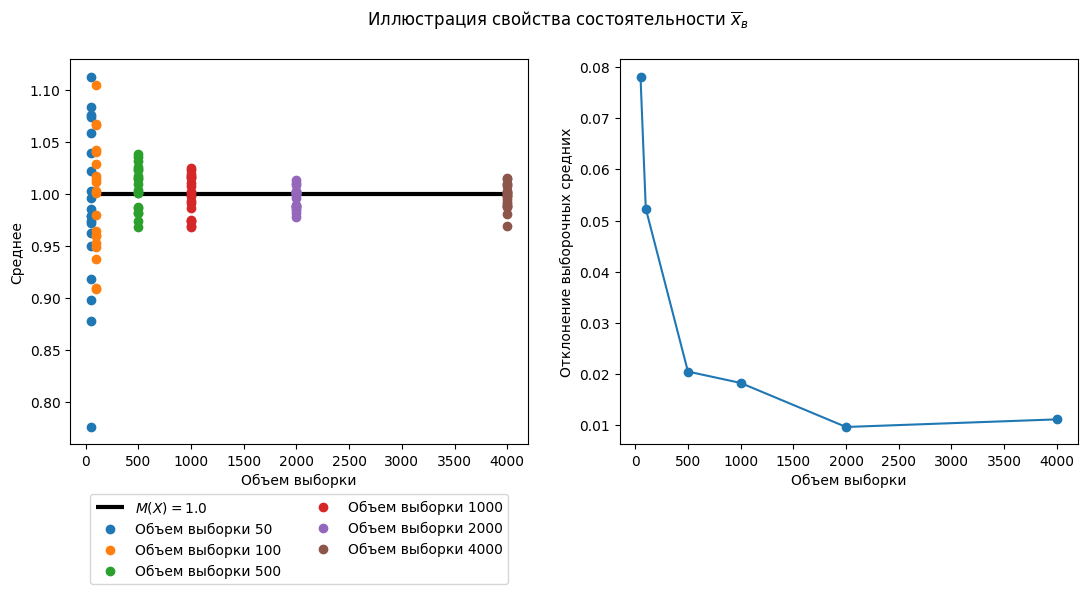

In [ ]:
# Иллюстрация состоятельности выборочной средней
# Запустите ячейку несколько раз и вы увидите, что с увеличением объема выборки отклонение найденных выборочных средних каждый раз будет стремится к 0

N = [50,100,500,1000,2000,4000] # объемы выборок
m = 20 # число выборок для каждого объема
plt.figure(figsize = (13, 5))
plt.suptitle('Иллюстрация свойства состоятельности $\overline {x}_в$')
plt.subplot(1,2,1)
plt.hlines(X_mean, N[0], N[-1], linewidth=3, color='k',label=f'$M(X)=${X_mean}')

samples_mean_std = []
for n in N:
  samples = [X.rvs(n) for _ in range(m)] # m штук выборок значений СВ, объема n каждая
  samples_mean = [sample.mean() for sample in samples] # выборочная средняя для каждой из выборок
  plt.plot([n]*m,samples_mean,'o',label=f'Объем выборки {n}')
  mean_std = np.std(samples_mean) # ср.кв.отклонение выборочных средних для выборок данного объема
  samples_mean_std.append(mean_std)
plt.xlabel('Объем выборки')
plt.ylabel('Среднее')
plt.legend(bbox_to_anchor=[0.5, -0.11], loc=9, ncol=2)

plt.subplot(1,2,2)
plt.plot(N, samples_mean_std, 'o-')
plt.xlabel('Объем выборки')
plt.ylabel('Отклонение выборочных средних')
plt.show()

##### Робастность (устойчивость к выбросам) мер среднего

Рассмотрим на примере, как влияет на значение оценок-мер среднего наличие в выборке нетипичных значений. Такие значения вариант, резко отличающиеся от типичных значений признака, называются **выбросами**.

In [ ]:
sample = np.array([8, 2, 3, 2, 5, 3, 5, 8, 2, 4, 6])
print('Выборочная средняя', sample.mean())
print('Выборочная медиана', np.median(sample))
print('Выборочная мода', sts.mode(sample)[0])

Выборочная средняя 4.363636363636363
Выборочная медиана 4.0
Выборочная мода 2


Добавим в выборку одно значение-выброс и заново посчитаем те же точечные оценки:

In [ ]:
sample_with_outlier = np.append(sample, 100)
print('Выборка с выбросом:', *sample_with_outlier)
print('Выборочная средняя', sample_with_outlier.mean())
print('Выборочная медиана', np.median(sample_with_outlier))
print('Выборочная мода', sts.mode(sample_with_outlier)[0])

Выборка с выбросом: 8 2 3 2 5 3 5 8 2 4 6 100
Выборочная средняя 12.333333333333334
Выборочная медиана 4.5
Выборочная мода 2


Добавление только одного единственного выбороса серьезно изменило значение средней. Значение медианы изменилось, но совсем не столь значительно, как выборочная средняя. Выборочная мода же не изменилась вовсе.

Как мы видим, при наличии выбросов в выборке выборочная средняя может быть далека от типичных значений исследуемого признака, в отличии от выборочных медианы и моды, которые более устойчивы к наличию выбросов (как и выборочные квантили).

Чувствительность к выбросам — это серьезный недостаток выборочной средней как оценки.


#### Меры вариативности (рассеивания)

Это показатели, оценивающие изменчивость, ширину разброса данных.

Помимо рассмотренных ниже оценок, также к мерам рассеивания относятся:
* размах $R = x_{max}-x_{min}$,
* интерквартильный (межквартильный) размах $IQR = Q_3-Q_1$,
* $MAD$ (медианное абсолютное отклонение),
* коэффициент вариации,    
и др.

##### __Выборочная дисперсия__

__Выборочной дисперсией__ называется среднее арифметическое квадратов отклонений наблюдаемых значений признака от их среднего
$$D_В = \frac {1}{n} \cdot \sum_{i=1}^n {\left ( x_i - \overline x_В \right)^2 }$$

Выборочная дисперсия позволяет получит оценку генеральной дисперсии (дисперсии случайной величины $X$) по данным выборки. Она характеризует рассеивание значений признака выборочной совокупности вокруг своего среднего значения.

Для вычисления выборочной дисперсии можно использовать функцию `var` библиотеки *numpy* (`nanvar`, если в выборке могут оказаться `NaN` и их нужно не учитывать):

<pre><code>numpy.var(выборка)</pre></code>

[Документация функции *var* библиотеки *numpy*](https://numpy.org/doc/stable/reference/generated/numpy.var.html)

[Документация функции *nanvar* библиотеки *numpy*](https://numpy.org/doc/stable/reference/generated/numpy.nanvar.html)

In [ ]:
# Пример вычисления выборочной дисперсии
sample_1_var = np.var(sample_1)
sample_2_var = np.var(sample_2)
print('Выборочная дисперсия для первой выборки (дискретный признак) равна', sample_1_var)
print('Выборочная дисперсия для второй выборки (непрерывный признак) равна', sample_2_var)

Выборочная дисперсия для первой выборки (дискретный признак) равна 2.4436
Выборочная дисперсия для второй выборки (непрерывный признак) равна 4.0841881963999995


При работе с *Series* или *DataFrame* для вычисления выборочной средней можно использовать метод `var` библиотеки *pandas*, указав параметр `ddof=0`

<pre><code>Series.var(ddof=0)</pre></code>
<pre><code>DataFrame.var(ddof=0)</pre></code>

[Документация метода *var* класса *Series* библиотеки *pandas*](https://pandas.pydata.org/docs/reference/api/pandas.Series.var.html)

[Документация метода *var* класса *DataFrame* библиотеки *pandas*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.var.html)

In [ ]:
# Пример вычисления выборочной дисперсии для признака hours-per-week
data['hours-per-week'].var(ddof=0)

153.85748727277652

Выборочная дисперсия не является «хорошей» оценкой для генеральной дисперсии, поскольку это смещенная оценка: такая оценка будет приводить к *систематическим* ошибкам, давая заниженное значение генеральной дисперсии.

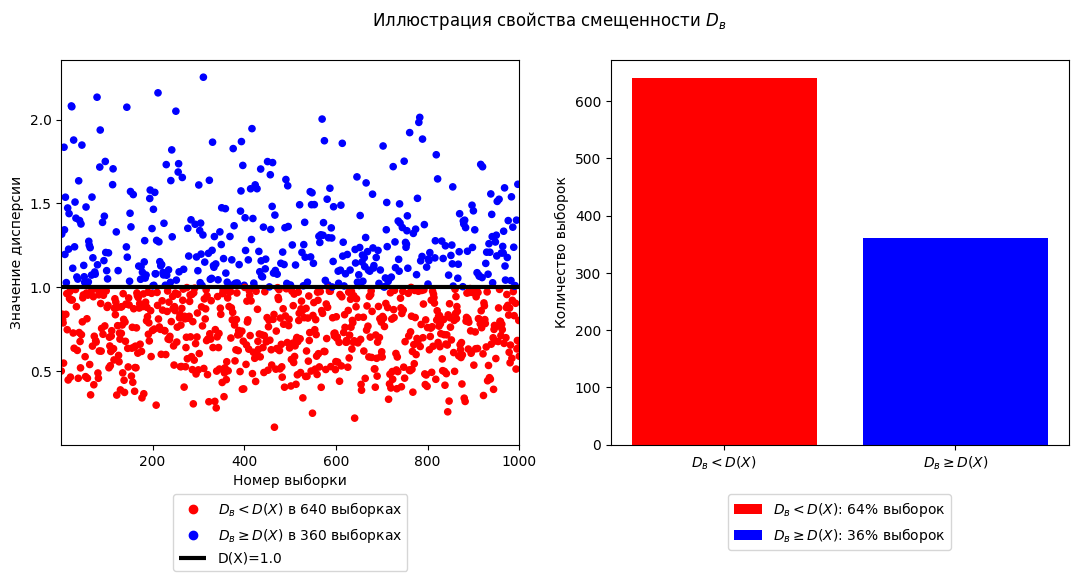

In [ ]:
# Иллюстрация смещенности выборочной дисперсии
# Запустите ячейку несколько раз и вы увидите, что доля выборок с "заниженной" выборочной дисперсией каждый раз будет больше
# Затем измените значение переменной ddof на 1 и перезапустите ячейку
# Вы увидите, что доли выборок с "заниженной" и не "заниженной" дисперсией перестанут значительно отличаться

ddof = 0
max = 1000 # количество выборок
n = 15 # объем выборки

X = sts.norm() # случайная величина со стандартным нормальным распределением
X_var = X.var()  # дисперсия СВ
plt.figure(figsize = (13, 5))
plt.suptitle('Иллюстрация свойства смещенности $D_в$')
plt.subplot(1,2,1)
line = plt.hlines(X_var, 1, max, linewidth=3, color='k')

samples = [X.rvs(n) for _ in range(max)] # выборки значений СВ, объема n
samples_var = [sample.var(ddof=ddof) for sample in samples] # выборочная дисперсия для каждой из выборок
# для каждой выборочной дисперсии определяем, меньше ли она дисперсии СВ или нет
var_label = lambda sample_var, X_var: -1 if sample_var - X_var < 0 else 1
var_colors = [var_label(sample_var,X_var) for sample_var in samples_var]
colors = ['red', 'blue']
scatter = plt.scatter(np.arange(max)+1, samples_var, s=20, c=var_colors, cmap=ListedColormap(colors))
var_pos = len([i for i in var_colors if i==1])
var_neg = len([i for i in var_colors if i==-1])
var_pos_label = '$D_в \geq D(X)$'
var_neg_label = '$D_в<D(X)$'
classes = [f'{var_neg_label} в {var_neg} выборках',f'{var_pos_label} в {var_pos} выборках']
plt.legend(handles=scatter.legend_elements()[0]+[line], labels=classes+[f'D(X)={X_var:.1f}'], bbox_to_anchor=[0.5, -0.11], loc=9)
plt.xlabel('Номер выборки')
plt.ylabel('Значение дисперсии')
plt.xlim(1,max)

plt.subplot(1,2,2)
counts = [len([i for i in var_colors if i==-1]),len([i for i in var_colors if i==1])]
bar_labels = [f'{var_neg_label}: {round(var_neg/max*100)}% выборок', f'{var_pos_label}: {round(var_pos/max*100)}% выборок']
plt.bar([var_neg_label, var_pos_label], counts, color=colors, label=bar_labels)
plt.legend(bbox_to_anchor=[0.5, -0.11], loc=9)
plt.ylabel('Количество выборок')
plt.show()

Поэтому из-за смещенности выборочной дисперсии используют исправленную дисперсию, которая уже будет несмещенной оценкой.

__Исправленной дисперсией__ называется величина
$$s^2 = \frac {n}{n-1} \cdot D_В = \frac {1}{n-1} \cdot \sum_{i=1}^n {\left ( x_i - \overline x_В \right)^2 }$$

При больших значениях $n$ величина $\dfrac {n}{n-1}$ мало отличается от 1, поэтому на практике рекомендуется пользоваться исправленной дисперсией для выборок малого объема (как правило, $n<30$).

Если в знаменателе формулы выборочной дисперсии стоит $n$, то знаменателе формулы исправленной дисперсии стоит $n-1$. Число, которое будет вычитаться из $n$ в знаменателе формулы, задается параметром `ddof`. По умолчанию он равен 0.   
Для исправленной дисперсии нужно указать `ddof = 1`:

<pre><code>numpy.var(выборка, ddof=1)</pre></code>

In [ ]:
# Пример вычисления исправленной дисперсии
sample_1_var = np.var(sample_1, ddof=1)
sample_2_var = np.var(sample_2, ddof=1)
print('Исправленная дисперсия для первой выборки (дискретный признак) равна', sample_1_var)
print('Исправленная дисперсия для второй выборки (непрерывный признак) равна', sample_2_var)

Исправленная дисперсия для первой выборки (дискретный признак) равна 2.493469387755102
Исправленная дисперсия для второй выборки (непрерывный признак) равна 4.125442622626262


При работе с *Series* и *DataFrame* метод `var` библиотеки *pandas* по умолчанию вычисляет исправленную дисперсию:

<pre><code>Series.var()</pre></code>
<pre><code>DataFrame.var()</pre></code>

In [ ]:
# Пример вычисления исправленной выборочной дисперсии для признака hours-per-week
data['hours-per-week'].var()

153.86335723146843

##### __Выборочное среднее квадратическое отклонение__

__Выборочным средним квадратическим отклонением__ называется называется величина
$$σ_В = \sqrt {D_В}$$

Также как и выборочная дисперсия, выборочное среднее квадратическое отклонение характеризует рассеивание значений признака выборочной совокупности вокруг своего среднего значения.   
Но, в отличии от дисперсии, выборочное среднее квадратическое отклонение дает усредненную величину отклонения значений в выборке от их среднего значения в исходных единицах измерения (в дисперсии будут квадраты единиц измерения), что удобнее для анализа.

Для вычисления выборочного среднего квадратического отклонения используется функция `std` библиотеки *numpy* (`nanstd`, если в выборке могут оказаться `NaN` и их нужно не учитывать):

<pre><code>numpy.std(выборка)</pre></code>

[Документация функции *std* библиотеки *numpy*](https://numpy.org/doc/stable/reference/generated/numpy.std.html)

[Документация функции *nanstd* библиотеки *numpy*](https://numpy.org/doc/stable/reference/generated/numpy.nanstd.html)


Для оценки генерального среднего квадратического отклонения (среднего квадратического отклонения случайной величины X) используют __исправленное среднее квадратическое отклонение__, определяемое как
$$s=\sqrt {s^2} = \sqrt { \frac {1}{n-1} \cdot \sum_{i=1}^n {\left ( x_i - \overline x_В \right)^2 }}$$

Аналогично вычислению исправленной дисперсии, для исправленного среднего квадратического отклонения нужно указать параметр `ddof = 1`:

<pre><code>numpy.std(выборка, ddof=1)</pre></code>

In [ ]:
# Пример вычисления выборочного среднего квадратического отклонения и исправленного среднего квадратического отклонения
sample_1_std = np.std(sample_1, ddof=1)
sample_2_std = np.std(sample_2)
print('Исправленное среднее квадратическое отклонение для первой выборки (дискретный признак) равна', sample_1_std)
print('Выборочное среднее квадратическое отклонение для второй выборки (непрерывный признак) равна', sample_2_std)

Исправленное среднее квадратическое отклонение для первой выборки (дискретный признак) равна 1.5790723187223257
Выборочное среднее квадратическое отклонение для второй выборки (непрерывный признак) равна 2.020937454846141


При работе с *Series* или *DataFrame* для вычисления исправленного среднего квадратического отклонения можно использовать метод `std` библиотеки *pandas*

<pre><code>Series.std()</pre></code>
<pre><code>DataFrame.std()</pre></code>

По умолчанию метод вычисляет исправленное среднее квадратическое отклонение. Для выборочного, неисправленого значения установите параметр `ddof=0`.

[Документация метода *std* класса *Series* библиотеки *pandas*](https://pandas.pydata.org/docs/reference/api/pandas.Series.std.html)

[Документация метода *std* класса *SeriesDataFrame* библиотеки *pandas*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html)

In [ ]:
# Пример вычисления исправленного среднего квадратического отклонения для признака hours-per-week
data['hours-per-week'].std()

12.404166930167799

Если нам известно, что для признака *hours-per-week* (количество рабочих часов в неделю) выборочная средняя равна (после округления) 40,4, а исправленное среднее квадратическое отклонение равно 12,4, то мы можем заключить, что в среднем респонденты работают 40,4 часов в неделю и среднее отклонение от 40,4 часов составляет 12,4 часа.

##### Робастность (устойчивость к выбросам) мер вариативности

Все оценки, основанные на вычислении выборочной средней, то есть и дисперсия, и среднее квадратическое отклонение, как выборочные, так и исправленные, чувствительны к выборосам. Устойчивость к выбросам среди мер вариативности показывают интерквартильный размах и медианное абсолютное отклонение.

#### Метод *describe* библиотеки *pandas*

При работе с *Series* или *DataFrame* можно использовать метод *describe* для получения основных описательных статистик.

<pre><code>Series.describe()</pre></code>
<pre><code>DataFrame.describe()</pre></code>

Метод возвращает *Series* или *DataFrame* , в котором для признака (для каждого признака) будут указаны:
* *count* — объем выборки,
* *mean* — выборочное среднее,
* *std* — исправленное среднее квадратическое отклонение,
* *min* — минимальная варианта,
* *25%* — 25%-ый процентиль (первый выборочный квартиль),
* *50%* — выборочная медиана,
* *75%* — 75%-ый процентиль (третий выборочный квартиль),
* *max* — максимальная варианта.

[Документация метода *describe* класса *Series* библиотеки *pandas*](https://pandas.pydata.org/docs/reference/api/pandas.Series.describe.html)

[Документация метода *describe* класса *DataFrame* библиотеки *pandas*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

#### Меры формы

Это показатели, оценивающие отклонение формы распределения признака от кривой нормального распределения. Будут рассмотрены в одной из следующих лабораторных.

### Интервальные оценки

Очевидно, что найденная по выборке точечная статистическая оценка $\theta^*$ будет отличаться от оцениваемой числовой характеристики $\theta$ случайной величины (генеральной совокупности).

Точность оценки $\theta^*$ определяется величиной $|\theta-\theta^*|$.

Попробуем несколько раз извечь выборку одинакового объема из генеральной совокупности и посмотрим, как будут отличаться точечные статистические оценки математического ожидания и среднего квадратического отклонения от их истинных значений:

In [ ]:
# Создаем случайную величину со нормальным законом распределения c параметрами m = 1, σ = 2
# Все возможные значения случайной величины образуют генеральную совокупность
n = 5 # число итераций
m = 1
sigma = 2
X = sts.norm(m, sigma)
for i in range(1,n+1):
  print(f'Итерация №{i}')
  # генерация массива из 100 случайных значений случайной величины - имитация выборки значений признака Х
  sample = X.rvs(100)
  sample_mean = np.mean(sample)
  sample_std = np.std(sample)
  mean_deviation = abs(sample_mean - m)
  std_deviation = abs(sample_std - sigma)
  print(f'Выборочное среднее равно {np.mean(sample):.3f}, абсолютное отклонение от M(X) составляет {mean_deviation:.3f}')
  print(f'Выборочное среднее квадратическое отклонение равно {np.std(sample):.3f}, абсолютное отклонение от σ(X) составляет {std_deviation:.3f}\n')


Итерация №1
Выборочное среднее равно 0.836, абсолютное отклонение от M(X) составляет 0.164
Выборочное среднее квадратическое отклонение равно 2.001, абсолютное отклонение от σ(X) составляет 0.001

Итерация №2
Выборочное среднее равно 1.167, абсолютное отклонение от M(X) составляет 0.167
Выборочное среднее квадратическое отклонение равно 2.059, абсолютное отклонение от σ(X) составляет 0.059

Итерация №3
Выборочное среднее равно 0.950, абсолютное отклонение от M(X) составляет 0.050
Выборочное среднее квадратическое отклонение равно 1.941, абсолютное отклонение от σ(X) составляет 0.059

Итерация №4
Выборочное среднее равно 0.802, абсолютное отклонение от M(X) составляет 0.198
Выборочное среднее квадратическое отклонение равно 1.880, абсолютное отклонение от σ(X) составляет 0.120

Итерация №5
Выборочное среднее равно 0.943, абсолютное отклонение от M(X) составляет 0.057
Выборочное среднее квадратическое отклонение равно 1.824, абсолютное отклонение от σ(X) составляет 0.176



Если $|\theta-\theta^*|<\delta$, где $\delta>0$, то $\delta$ характеризует __точность оценки__. Чем меньше $\delta$, тем точнее оценка.

Статистические методы не позволяют категорически утверждать, что оценка $\theta^*$ удовлетворяет неравенству $|\theta-\theta^*|<\delta$, можно лишь говорить о вероятности $\gamma$, с которой это неравенство выполняется.

Вероятность $\gamma$, с которой выполняется неравенство $|\theta-\theta^*|<\delta$, называется __надежностью__ (доверительной вероятностью) оценки $\theta^*$:
$$\gamma = P\left (|\theta-\theta^*|<\delta \right)$$
или
$$\gamma = P\left (\theta^*-\delta < \theta < \theta^*+\delta \right)$$

Последнее неравенство следует понимать так:
вероятность того, что интервал $\left(\theta^*-\delta ; \theta^*+\delta \right)$ покрывает (т. е. заключает в себе) неизвестный оцениваемый параметр $\theta$ , равна $\gamma$.

Обычно надежность оценки задается наперед, причем в качестве $\gamma$ берут число, близкое к 1: 0.95, 0.99 и т. п.

Таким образом, вместо точечной статической оценки, которая заведомо отклоняется от значения оцениваемого параметра признака с неизвестым нам отклонением, можно получить в качестве оценки интервал (концы интервала), который с заданной вероятностью покрывает оцениваемый параметр.

Такой интервал называется __доверительным__ интервалом.

#### Построение доверительного интервала для среднего значения нормально распределенной случайной величины

Пусть генеральная совокупность образована значениями нормально распределенного признака $X$.

Из генеральной совокупности была извлечена выборка объема $n$. Для получения интервальной оценки истинного значения математического ожидания (истинного значения измеряемой величины) $m=M(X)$ можно использовать выборочную среднюю $\overline x_В$.

##### __при известном среднем квадратическом отклонении__

Можно доказать, что в случае, когда известно среднее квадратическое отклонение признака $X$ (случайной величины) $\sigma=\sigma(X)$, с надежностью $\gamma$ доверительный интервал
$$\left( \overline x_В - \frac {\sigma}{\sqrt n} \cdot F^{-1}_0 \left( \frac {\gamma+1}{2} \right) ; \overline x_В + \frac {\sigma}{\sqrt n} \cdot F^{-1}_0 \left( \frac {\gamma+1}{2} \right) \right)$$
покрывает неизвестный параметр $m=M(X)$.

Здесь $F^{-1}_0 \left( \frac {\gamma+1}{2} \right)$ - квантиль стандартного нормального закона распределения для вероятности $\frac {\gamma+1}{2}$.


Для получения концов доверительного интервала для среднего значения нормально распределенной случайной величины в случае, когда среднее квадратическое отклонение случайной величины известно, можно использовать метод `interval` класса `norm`:

<pre><code>scipy.stats.norm.interval(γ, loc = выборочная_средняя, scale = σ/объем_выборки**0.5)</pre></code>

либо

<pre><code>scipy.stats.norm(выборочная_средняя, σ/объем_выборки**0.5).interval(γ)</pre></code>

Метод `interval` возвращает кортеж из двух значений: левой и правой границ доверительного интервала.

In [ ]:
# Пример построения доверительного интервала для среднего значения признака с нормальным распределением при известном ср.кв.отклонении
gamma = 0.97 # надежность
sigma = 2 # известное среднее квадратическое отклонение случайной величины признака X

sample_2_mean = sample_2.mean() # выборочное среднее
n = len(sample_2) # объем выборки

sts.norm(sample_2_mean, sigma/n**0.5).interval(gamma)

(4.702041924483088, 5.5700780755169115)

Также можно непосредственно получить границы доверительного интервала по вышеприведенной формуле, использовав при вычислении точности $\delta = \frac {\sigma}{\sqrt n} \cdot F^{-1}_0 \left( \frac {\gamma+1}{2} \right)$ квантиль __стандартного__ нормального закона распредления.

##### при __не__известном среднем квадратическом отклонении

Далеко не всегда среднее квадратическое значение признака является известным.

Можно доказать, что в случае, когда не известно среднее квадратическое отклонение признака $X$ (случайной величины), с надежностью $\gamma$ доверительный интервал
$$\left( \overline x_В - \frac {s}{\sqrt n} \cdot t_{\frac {\gamma+1}{2}} ; \overline x_В + \frac {s}{\sqrt n} \cdot t_{\frac {\gamma+1}{2}} \right)$$
покрывает неизвестный параметр $m=M(X)$.

Здесь $s$ - исправленное выборочное среднее квадратическое отклонение, $t_{\frac {\gamma+1}{2}}$ - квантиль распределения Стьюдента с $n-1$ степенями свободы для вероятности $\frac {\gamma+1}{2}$.

Для получения концов доверительного интервала для среднего значения нормально распределенной случайной величины в случае, когда среднее квадратическое отклонение случайной величины не известно, можно использовать метод `interval` класса `t` (распределение Стьюдента):

<pre><code>scipy.stats.t.interval(γ, df = объем_выборки-1, loc = выборочная_средняя, scale = s/объем_выборки**0.5)</pre></code>

либо

<pre><code>scipy.stats.t(df = объем_выборки-1, loc = выборочная_средняя, scale = s/объем_выборки**0.5).interval(γ)</pre></code>


Метод `interval` возвращает кортеж из двух значений: левой и правой границ доверительного интервала.

[Документация класса *t*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html)

In [ ]:
# Пример построения доверительного интервала для среднего значения признака с нормальным распределением при неизвестном ср.кв.отклонении
gamma = 0.97 # надежность

sample_3_mean = sample_3.mean() # выборочное среднее
sample_3_s = sample_3.std(ddof=1) # исправленное выборочное среднее квадратическое отклонение
n = len(sample_3) # объем выборки

sts.t(n-1, sample_3_mean, sample_3_s/n**0.5).interval(gamma)

(4.114514242162599, 5.429965757837401)

Также можно непосредственно получить границы доверительного интервала по вышеприведенной формуле, использовав при вычислении точности $\delta = \frac {s}{\sqrt n} \cdot t_{\frac {\gamma+1}{2}}$ квантиль распредления Стьюдента (класс `t`) с числом степеней свободы $n-1$.

#### Построение доверительного интервала для среднего квадратического отклонения нормально распределенной случайной величины

Пусть генеральная совокупность образована значениями нормально распределенного признака $X$.

Из генеральной совокупности была извлечена выборка объема $n$. Для получения интервальной оценки генерального среднего квадратического отклоенения $\sigma=\sigma(X)$ можно использовать исправленное выборочное среднее квадратическое отлонение $s$.

Можно доказать, что с надежностью $\gamma$ доверительный интервал
$$\left( \frac {s\sqrt{n-1}}{\sqrt {\chi_2^2}} ; \frac {s\sqrt{n-1}}{\sqrt {\chi_1^2}}\right)$$
покрывает неизвестный параметр $\sigma$.

Здесь $\chi_1^2$ - квантиль распределения $\chi^2$ (хи-квадрат) с $n-1$ степенями свободы для вероятности $\dfrac {1-\gamma}{2}$, $\chi_2^2$ - квантиль распределения $\chi^2$ с $n-1$ степенями свободы для вероятности $\dfrac {1+\gamma}{2}$

Для получения концов доверительного интервала для среднего квадратического отклонения необходимо сначала вычислить квантили распределения $\chi^2$ с $n-1$ степенями свободы для вероятности $\dfrac {1-\gamma}{2}$ и $\dfrac {1+\gamma}{2}$, использовав соответствующий метод класса `chi2` (распределение хи-квадрат):

<pre><code>scipy.stats.chi2.ppf(вероятность, df = объем_выборки-1)</pre></code>

либо

<pre><code>scipy.stats.chi2(df = объем_выборки-1).ppf(вероятность)</pre></code>

А затем, используя полученные значения и вышеприведенную формулу, вычислить концы доверительного интервала.

[Документация класса *chi2*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html)